In [ ]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
dem_18 = pd.read_csv('Raw_data/Democratic_alltime_100likes_18-19.csv')
dem_22 = pd.read_csv('Raw_data/Democratic_alltime_100likes_22-23.csv')
rep_18 = pd.read_csv('Raw_data/Republican_alltime_100likes_18-19.csv')
rep_22 = pd.read_csv('Raw_data/Republican_alltime_100likes_22-23.csv')

In [ ]:
def vadar_sentiment_analysis(df):
    df['neg'] = np.NaN
    df['neu'] = np.NaN
    df['pos'] = np.NaN
    df['sentiment_compound'] = np.NaN
    length = len(df)
    for i in tqdm(range(length)):
        content = df.iloc[i,1]
        scores = sid.polarity_scores(content)
        # {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}
        df.iloc[i,3] = scores['neg']/len(content)
        df.iloc[i,4] = scores['neu']/len(content)
        df.iloc[i,5] = scores['pos']/len(content)
        df.iloc[i,6] = scores['compound']/len(content)
    return df

In [ ]:
dem_18 = vadar_sentiment_analysis(dem_18)
dem_22 = vadar_sentiment_analysis(dem_22)
rep_18 = vadar_sentiment_analysis(rep_18)
rep_22 = vadar_sentiment_analysis(rep_22)

100%|██████████| 14528/14528 [00:06<00:00, 2137.65it/s]


In [ ]:
print('Democratic Party [2018]:{0:.10f}'.format(dem_18['sentiment_compound'].mean()))
print('Republican Party [2018]:{0:.10f}'.format(rep_18['sentiment_compound'].mean()))
print('Democratic Party [2022]:{0:.10f}'.format(dem_22['sentiment_compound'].mean()))
print('Republican Party [2022]:{0:.10f}'.format(rep_22['sentiment_compound'].mean()))

Democratic Party [2018]:0.0016527097
Republican Party [2018]:0.0012563693
Democratic Party [2022]:0.0017907661
Republican Party [2022]:0.0014087857


In [ ]:
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [ ]:
emotion_dict = get_nrc_data()
print(emotion_dict['abandoned'])
emotion_dict

['anger', 'fear', 'negative', 'sadness']


{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [ ]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}  # unique set of emotions
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [ ]:
dem_18.head(1)

,publisher_id,content,publish_time,neg,neu,pos,sentiment_compound
0,@PeoplesParty_US,”The Democratic Party cannot be reformed. The ...,2018-01-01T01:17:11.000Z,0.0,0.003409,0.001136,0.003929


In [ ]:
def NRC_sentiment_analysis(df):
    df['disgust'] = np.NaN
    df['fear'] = np.NaN
    df['negative'] = np.NaN
    df['joy'] = np.NaN
    df['anger'] = np.NaN
    df['trust'] = np.NaN
    df['sadness'] = np.NaN
    df['anticipation'] = np.NaN
    df['positive'] = np.NaN
    df['surprise'] = np.NaN
    length = len(df)
    for i in tqdm(range(length)):
        content = df.iloc[i,1]
        emotion_dict = emotion_analyzer(content)
        # {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}
        df.iloc[i,7] = emotion_dict['disgust']
        df.iloc[i,8] = emotion_dict['fear']
        df.iloc[i,9] = emotion_dict['negative']
        df.iloc[i,10] = emotion_dict['joy']
        df.iloc[i,11] = emotion_dict['anger']
        df.iloc[i,12] = emotion_dict['trust']
        df.iloc[i,13] = emotion_dict['sadness']
        df.iloc[i,14] = emotion_dict['anticipation']
        df.iloc[i,15] = emotion_dict['positive']
        df.iloc[i,16] = emotion_dict['surprise']
    return df

In [ ]:
dem_18 = NRC_sentiment_analysis(dem_18)
dem_22 = NRC_sentiment_analysis(dem_22)
rep_18 = NRC_sentiment_analysis(rep_18)
rep_22 = NRC_sentiment_analysis(rep_22)

100%|██████████| 14528/14528 [00:29<00:00, 497.73it/s]


In [ ]:
dem_18.head(2)

,publisher_id,content,publish_time,neg,neu,pos,sentiment_compound,disgust,fear,negative,joy,anger,trust,sadness,anticipation,positive,surprise
0,@PeoplesParty_US,”The Democratic Party cannot be reformed. The ...,2018-01-01T01:17:11.000Z,0.000000,0.003409,0.001136,0.003929,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,@JoinTravisAllen,HAPPY NEW YEAR from and the California Democr...,2018-01-01T04:20:30.000Z,0.000307,0.003237,0.000606,0.002271,0.023256,0.023256,0.023256,0.0,0.023256,0.0,0.023256,0.0,0.0,0.0


In [ ]:
dem_18_disgust = dem_18['disgust'].mean()
dem_18_fear = dem_18['fear'].mean()
dem_18_negative = dem_18['negative'].mean()
dem_18_joy = dem_18['joy'].mean()
dem_18_anger = dem_18['anger'].mean()
dem_18_trust = dem_18['trust'].mean()
dem_18_sadness = dem_18['sadness'].mean()
dem_18_anticipation = dem_18['anticipation'].mean()
dem_18_positive = dem_18['positive'].mean()
dem_18_surprise = dem_18['surprise'].mean()

dem_22_disgust = dem_22['disgust'].mean()
dem_22_fear = dem_22['fear'].mean()
dem_22_negative = dem_22['negative'].mean()
dem_22_joy = dem_22['joy'].mean()
dem_22_anger = dem_22['anger'].mean()
dem_22_trust = dem_22['trust'].mean()
dem_22_sadness = dem_22['sadness'].mean()
dem_22_anticipation = dem_22['anticipation'].mean()
dem_22_positive = dem_22['positive'].mean()
dem_22_surprise = dem_22['surprise'].mean()

rep_18_disgust = rep_18['disgust'].mean()
rep_18_fear = rep_18['fear'].mean()
rep_18_negative = rep_18['negative'].mean()
rep_18_joy = rep_18['joy'].mean()
rep_18_anger = rep_18['anger'].mean()
rep_18_trust = rep_18['trust'].mean()
rep_18_sadness = rep_18['sadness'].mean()
rep_18_anticipation = rep_18['anticipation'].mean()
rep_18_positive = rep_18['positive'].mean()
rep_18_surprise = rep_18['surprise'].mean()

rep_22_disgust = rep_22['disgust'].mean()
rep_22_fear = rep_22['fear'].mean()
rep_22_negative = rep_22['negative'].mean()
rep_22_joy = rep_22['joy'].mean()
rep_22_anger = rep_22['anger'].mean()
rep_22_trust = rep_22['trust'].mean()
rep_22_sadness = rep_22['sadness'].mean()
rep_22_anticipation = rep_22['anticipation'].mean()
rep_22_positive = rep_22['positive'].mean()
rep_22_surprise = rep_22['surprise'].mean()

In [ ]:
NRC_compare_df = pd.DataFrame({'disgust':[dem_18_disgust,rep_18_disgust,dem_22_disgust,rep_22_disgust],
              'fear':[dem_18_fear,rep_18_fear,dem_22_fear,rep_22_fear],
              'negative':[dem_18_negative,rep_18_negative,dem_22_negative,rep_22_negative],
              'joy':[dem_18_joy,rep_18_joy,dem_22_joy,rep_22_joy],
              'anger':[dem_18_anger,rep_18_anger,dem_22_anger,rep_22_anger],
              'trust':[dem_18_trust,rep_18_trust,dem_22_trust,rep_22_trust],
              'sadness':[dem_18_sadness,rep_18_sadness,dem_22_sadness,rep_22_sadness],
              'anticipation':[dem_18_anticipation,rep_18_anticipation,dem_22_anticipation,rep_22_anticipation],
              'positive':[dem_18_positive,rep_18_positive,dem_22_positive,rep_22_positive],
              'surprise':[dem_18_surprise,rep_18_surprise,dem_22_surprise,rep_22_surprise]
             })
NRC_compare_df.index = ['Democratic 2018','Republican 2018','Democratic 2022','Republican 2022']
NRC_compare_df = NRC_compare_df[['disgust','fear','anger','sadness','joy','trust','anticipation','surprise','positive','negative']]
NRC_compare_df['pos-neg'] = NRC_compare_df['positive'] - NRC_compare_df['negative']
NRC_compare_df

,disgust,fear,anger,sadness,joy,trust,anticipation,surprise,positive,negative,pos-neg
Democratic 2018,0.007927,0.014072,0.014806,0.012833,0.010891,0.019933,0.014596,0.007313,0.032015,0.026248,0.005767
Republican 2018,0.009706,0.017118,0.016874,0.013581,0.010396,0.021383,0.013990,0.007367,0.030089,0.029979,0.000110
Democratic 2022,0.007840,0.014649,0.014564,0.012853,0.011403,0.021076,0.014875,0.007689,0.032971,0.027044,0.005928
Republican 2022,0.009274,0.017478,0.016400,0.013488,0.010326,0.020557,0.013827,0.007316,0.030390,0.029322,0.001068


In [ ]:
!pip install wordcloud --user


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
dem_18 = vadar_sentiment_analysis(dem_18)
dem_22 = vadar_sentiment_analysis(dem_22)
rep_18 = vadar_sentiment_analysis(rep_18)
rep_22 = vadar_sentiment_analysis(rep_22)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
text = ' '.join(rep_22['content'].tolist())

In [ ]:
from PIL import Image

mask = np.array(Image.open("Trump_Rep1.png"))

In [ ]:
def transform_mask():
    #这里使用的jpg，文件后缀根据自己情况改哦！
    mask = np.array(Image.open(f"Trump_Rep1.png")) 
    mask = mask[:,:,0] # transform 3d image to 2d for easier visualization
    
    def transform_format(val):
        if val.any()== 0:
            return 255
        else:
            return val

    # Transform your mask into a new one that will work with the function
    transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_format,mask[i]))
    
    return transformed_mask


In [ ]:
transformed_mask = transform_mask()

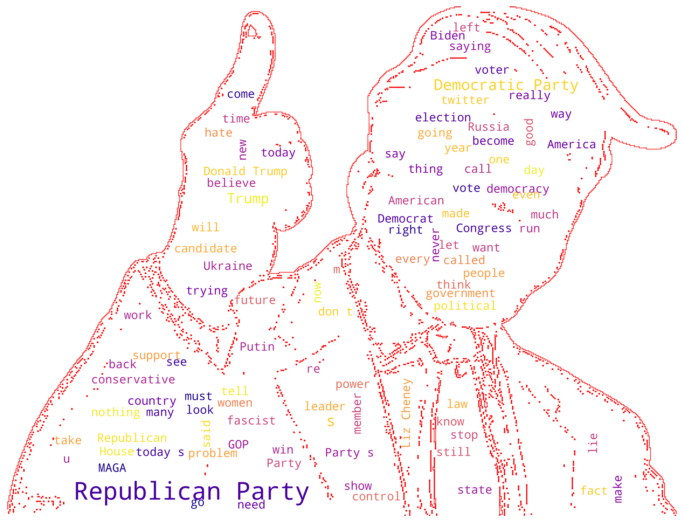

In [ ]:
wordcloud = WordCloud(max_words=100, scale=8,background_color="white",colormap="plasma",max_font_size = 1500,contour_width = 2, contour_color = 'red',mask=transformed_mask).generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
text = ' '.join(dem_22['content'].tolist())

In [ ]:
mask = np.array(Image.open(f"Biden_Dem.jpeg")) 
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
mask.shape

(702, 800)

In [ ]:
def transform_mask():
    #这里使用的jpg，文件后缀根据自己情况改哦！
    mask = np.array(Image.open(f"biden.jpeg")) 
    mask = mask[:,:,0] # transform 3d image to 2d for easier visualization
    
    def transform_format(val):
        if val.any()== 0:
            return 255
        else:
            return val

    # Transform your mask into a new one that will work with the function
    transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_format,mask[i]))
    
    return transformed_mask


In [ ]:
transformed_mask = transform_mask()

In [ ]:
mask = np.array(Image.open(f"biden.jpeg"))

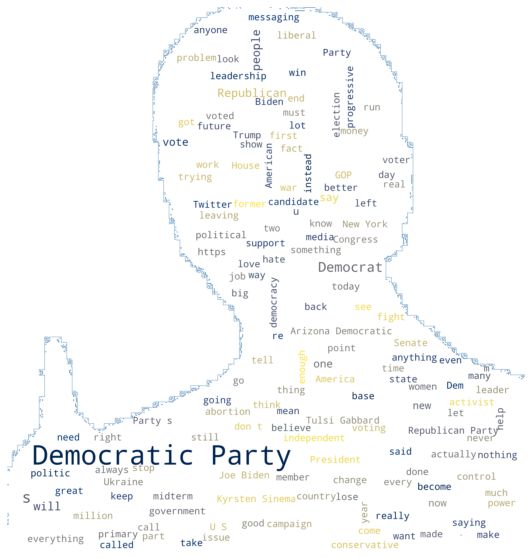

In [ ]:
wordcloud = WordCloud(max_words=150, scale=8,background_color="white",colormap="cividis",max_font_size = 40,contour_width = 2, contour_color = 'steelblue',mask=mask).generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


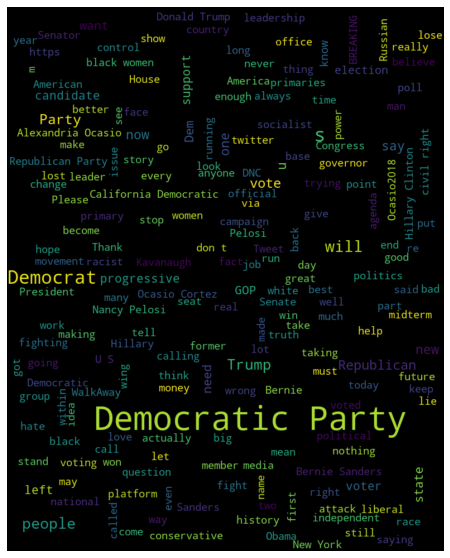

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the mask image
mask = np.array(Image.open("visit.png"))

wordcloud = WordCloud(background_color='black', mask=mask)

# Generate the WordCloud
wordcloud.generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
